# Bivariate Analysis

- The idea is to analyze two variables at the same and find any relation between them.
- One way is to use correlation coefficients to find if two columns are related or not
- It provides a broader perspective as compared to univariate analysis

#### Graphs
- Scatter Plots
- Mosaic Plots
- Histograms / bar plots
- Heatmaps
- Linecharts, and so on

### Correlation Coefficient
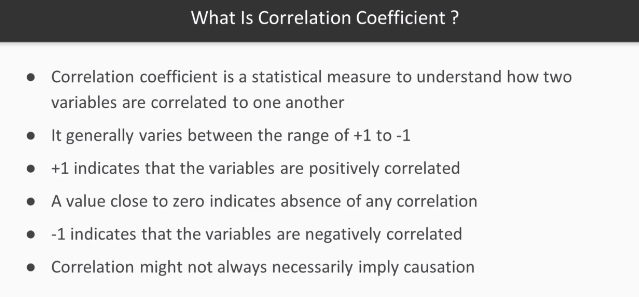

##### Pearson Correlation Coefficient
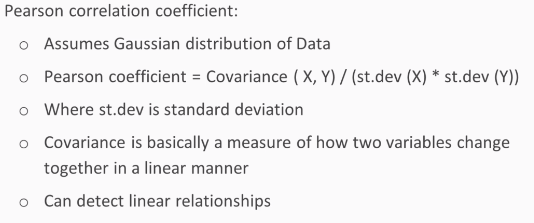

##### Spearman's Correlation Coefficient
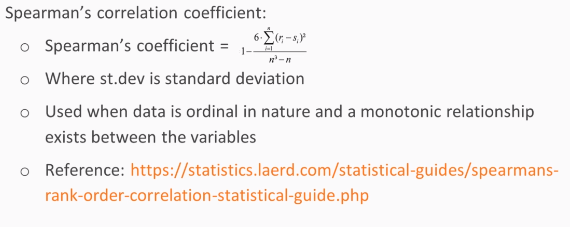

##### Kendal Tau's Correlation Coefficient
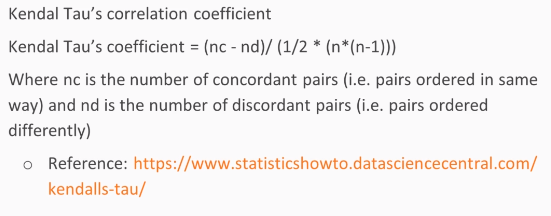

### Scatter Plots and Heatmaps

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
x1 = np.random.normal(10,1,200)*10

In [ ]:
x1

In [ ]:
sns.distplot(x1)

#### Negative Correlation with x1

In [ ]:
y1 = 100 - x1

In [ ]:
ax = sns.scatterplot(x1,y1,)
ax.set(xlabel='x1',ylabel='y1')
plt.show()

In [ ]:
from scipy.stats import pearsonr
pearsonr(x1,y1)

This is almost perfect negative correlation

#### Positive Correlation

###### In real world, you would probably see more noise in your data

In [ ]:
x2 = np.random.normal(10,1,200)*10
y2 = x2 + np.random.normal(40,5.2,200)

In [ ]:
ax = sns.scatterplot(x2,y2,)
ax.set(xlabel='x2',ylabel='y2')
plt.show()

In [ ]:
pearsonr(x2,y2)

### Heatmaps

In [ ]:
x3 = np.random.random(200)
y3 = x1+x3 - 20

x4 = np.random.normal(100,1.5,200)
y4 = x4 + x1 + x2

data_df = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'x4':x4,'y1':y1,'y2':y2,'y3':y3,'y4':y4})

In [ ]:
data_df.head()

In [ ]:
sns.pairplot(data_df)

## Use pandas corr() function to find correlation

In [ ]:
data_df.corr()

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(data_df.corr(),annot=False,linewidths=1,fmt='.2f')

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(data_df.corr(),annot=True,linewidths=1,fmt='.2f')

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(data_df.corr(method='spearman'),annot=True,linewidths=1,fmt='.2f')

##### Interesting links for Correlation Coefficients:
- https://stats.stackexchange.com/questions/8071/how-to-choose-between-pearson-and-spearman-correlation
- https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modelling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/
- https://stats.stackexchange.com/questions/344737/how-to-know-whether-pearsons-or-spearmans-correlation-is-better-to-use

#### Quick Recap
- We can use corr() function in pandas DataFrames, to find correlation between different variables of DataFrames
- We can visualize correlation between multiple variables together via heatmaps

References:

- https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


#### Bivariate Analysis for Titanic Dataset

In [ ]:
titanic_data_df = pd.read_csv('train.csv')

In [ ]:
titanic_data_df.columns

In [ ]:
g = sns.countplot(x='Sex',hue='Survived',data=titanic_data_df)

In [ ]:
g = sns.catplot(x='Embarked',col='Survived',data=titanic_data_df,kind='count',height=4,aspect=.7)

In [ ]:
g = sns.countplot(x='Embarked',hue='Survived',data=titanic_data_df)

In [ ]:
g = sns.countplot(x='Embarked',hue='Pclass',data=titanic_data_df)

In [ ]:
g = sns.countplot(x='Pclass',hue='Survived',data=titanic_data_df)

####  Add a new column - Family size

I will be adding a new column 'Family Size' which will be the SibSp and Parch + 1

In [ ]:
def add_family(df):
    df['FamilySize']=df['SibSp']+df['Parch']+1
    return df

titanic_data_df = add_family(titanic_data_df)
titanic_data_df.head(10)

In [ ]:
g = sns.countplot(x='FamilySize',hue='Survived',data=titanic_data_df)

In [ ]:
g = sns.countplot(x='FamilySize',hue='Sex',data=titanic_data_df)

#### Add a new column - Age Group

In [ ]:
age_df = titanic_data_df[~titanic_data_df['Age'].isnull()]
age_bins = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
age_df['ageGroup'] = pd.cut(titanic_data_df.Age,range(0,81,10),right=False,labels=age_bins)

In [ ]:
sns.countplot(x='ageGroup',hue='Survived',data=age_df)

### Bivariate Analysis for Video Games Sales dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [ ]:
data_df.columns

In [ ]:
data_df.head()

In [ ]:
data_df.info()

In [ ]:
data_df.describe()

The most obvious thing that comes to mind is that, is any column related to global sales for a Game?

In [ ]:
sns.pairplot(data_df)

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(data_df.corr(),annot=True,fmt='.2f')

#### Lets try focusing on Sales Related Columns only

In [ ]:
sns.heatmap(data_df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr(),annot=True,fmt='.2f')

In [ ]:
ax = sns.scatterplot(x=data_df['Critic_Score'],y=data_df['User_Score'])
ymin,ymax = ax.get_ylim()
ax.set_yticks(np.round(np.linspace(ymin,ymax,25,2)))
plt.tight_layout()
plt.locator_params(axis='y',nbins=6)
plt.show()

In [ ]:
score_df = data_df[['Critic_Score','User_Score']]
score_df = score_df[score_df['User_Score']!='tbd']
score_df['User_Score'] = pd.to_numeric(score_df['User_Score'],errors='coerce')
score_df.dropna(how='any',inplace=True)
score_df.info()

In [ ]:
sns.scatterplot(x=score_df['Critic_Score'],y=score_df['User_Score'])

In [ ]:
score_df.corr()

In [ ]:
score_df.corr(method='spearman')

#### Lets move on to Genre

In [ ]:
genre_group = data_df.groupby('Genre').size()
genre_group.plot.bar()

In [ ]:
data_df['Rating'].unique

In [ ]:
g = sns.catplot(x='Genre',hue='Rating',data=data_df,kind='count',height=10)

In [ ]:
count_year_gen = pd.DataFrame({'count':data_df.groupby(['Genre','Year_of_Release']).size()}).reset_index()
print(data_df.groupby(['Genre','Year_of_Release']).size())

#### Release by Genre

In [ ]:
ax = sns.boxplot(x='count',y='Genre',data=count_year_gen,whis=np.inf)

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.lineplot(x='Year_of_Release',y='count',hue='Genre',data=count_year_gen)

##### Code Modifed from : 
https://bokeh.pydata.org/en/latest/docs/user_guide/interaction/legends/htmls

In [ ]:
from bokeh.palettes import Spectral11
from bokeh.plotting import figure, output_file,show
from bokeh.models import Legend, LegendItem
p = figure(plot_width=800,plot_height=550)
p.background_fill_color='beige'

p.title.text = 'Click on legend entries to hide the corresponding lines'
import random
legend_list = []
for genre_id in count_year_gen['Genre'].unique():
    color = random.choice(Spectral11)
    df = pd.DataFrame(count_year_gen[count_year_gen['Genre']==genre_id])
    p.line(df['Year_of_Release'],df['count'],line_width=2,alpha=0.8,color=color,legend=genre_id)
    
p.legend.location='top_left'
p.legend.click_policy='hide'

show(p)

#### Sales per Genre per region

In [ ]:
genre_region_na = pd.DataFrame({'Sales':data_df.groupby('Genre')['NA_Sales'].sum()}).reset_index()
sns.barplot(x='Genre',y='Sales',data=genre_region_na)

In [ ]:
genre_region_eu = pd.DataFrame({'Sales':data_df.groupby('Genre')['EU_Sales'].sum()}).reset_index()
sns.barplot(x='Genre',y='Sales',data=genre_region_eu)

In [ ]:
genre_region_jp = pd.DataFrame({'Sales':data_df.groupby('Genre')['JP_Sales'].sum()}).reset_index()
sns.barplot(x='Genre',y='Sales',data=genre_region_jp)

In [ ]:
genre_region_other = pd.DataFrame({'Sales':data_df.groupby('Genre')['Other_Sales'].sum()}).reset_index()
sns.barplot(x='Genre',y='Sales',data=genre_region_other)

In [ ]:
platform_group = pd.DataFrame({'Sales':data_df.groupby(['Platform','Year_of_Release']).sum()}).reset_index()
print(data_df.groupby(['Platform','Year_of_Release']).size())

In [ ]:
data_df.groupby('Genre')['Publisher'].apply(lambda x:x.value_counts().index[0])

In [ ]:
# Genre by Critics Score

critic_genre_score = pd.DataFrame({'Score':data_df.groupby('Genre')['Critic_Score'].median()})
sns.barplot(x='Genre',y='Score',data=critic_genre_score)